# Algorithms statistics

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os

In [10]:
SEPARATHOR = ','
# FILE_PATH = '../tests/all_results.csv'
FILE_PATH = '../results.csv'

In [11]:
df = pd.read_csv(FILE_PATH, sep=SEPARATHOR)

In [12]:
df.sample(1)

,game_type,player1,player2,winner,seed
713,othello,mcts1000,mctsstrategies1000(random_strategy:mobility_st...,2,22021076


In [13]:
assert len(df[df.duplicated()]) == 0, 'Duplicated records in the results file.'

In [61]:
def rename(current_names, alg_names):
    result = []
    for name in current_names:
        if name == 0:
            result.append('draw')
        elif name == 1 or name == 2:
            result.append(alg_names[name - 1])
        else:
            result.append('error')
    return result

In [64]:
def draw_graphs(df):
    players = np.unique(np.concatenate((df_othello["player1"].unique(), df_othello["player2"].unique())))
    for player1 in players:
        df_player1 = df.loc[(df['player1'] == player1)]
        for player2 in players:
            df_player2 = df_player1.loc[(df_player1['player2'] == player2)]
            values = df_player2['winner']
            v_counts = values.value_counts()
            v_counts.index = rename(v_counts.index, [player1, player2])
            total = len(values)

            fig = plt.figure()
            plt.title(f"{player1} vs {player2}")
            plt.pie(v_counts, labels=v_counts.index, autopct=lambda x : '{:.2f}%\n({:.0f})'.format(x, total*x/100), shadow=True)

# Othello

In [35]:
df_othello = df[df['game_type']=='othello']

In [36]:
assert sum(df_othello["player2"].unique() == df_othello["player1"].unique()), 'Different players arrays'

In [16]:
n_games1 = len(df_othello.loc[(df_othello['player1'] == df_othello["player1"].unique()[0])])
for player1 in df_othello["player1"].unique():
    assert n_games1 == len(df_othello.loc[(df_othello['player1'] == player1)]), 'Different games player by first players'

n_games2 = len(df_othello.loc[(df_othello['player2'] == df_othello["player2"].unique()[0])])
for player2 in df_othello["player2"].unique():
    assert n_games2 == len(df_othello.loc[(df_othello['player2'] == player2)]), 'Different games player by second players'

assert n_games2 == n_games1, 'Different games player by players'

AssertionError: Different games player by first players

In [55]:
othello_results_dict = dict()
players = np.unique(np.concatenate((df_othello["player1"].unique(), df_othello["player2"].unique())))
for player_name in players:
    othello_results_dict[player_name] = [0,0,0]

for key in othello_results_dict.keys():
    # wins
    othello_results_dict[key][0] += len(df_othello.loc[(df_othello['player1'] == key) & (df_othello['winner'] == 1)])
    othello_results_dict[key][0] += len(df_othello.loc[(df_othello['player2'] == key) & (df_othello['winner'] == 2)])
    # draws
    othello_results_dict[key][1] += len(df_othello.loc[(df_othello['player1'] == key) & (df_othello['winner'] == 0)])
    othello_results_dict[key][1] += len(df_othello.loc[(df_othello['player2'] == key) & (df_othello['winner'] == 0)])
    # losses
    othello_results_dict[key][2] += len(df_othello.loc[(df_othello['player1'] == key) & (df_othello['winner'] == 2)])
    othello_results_dict[key][2] += len(df_othello.loc[(df_othello['player2'] == key) & (df_othello['winner'] == 1)])

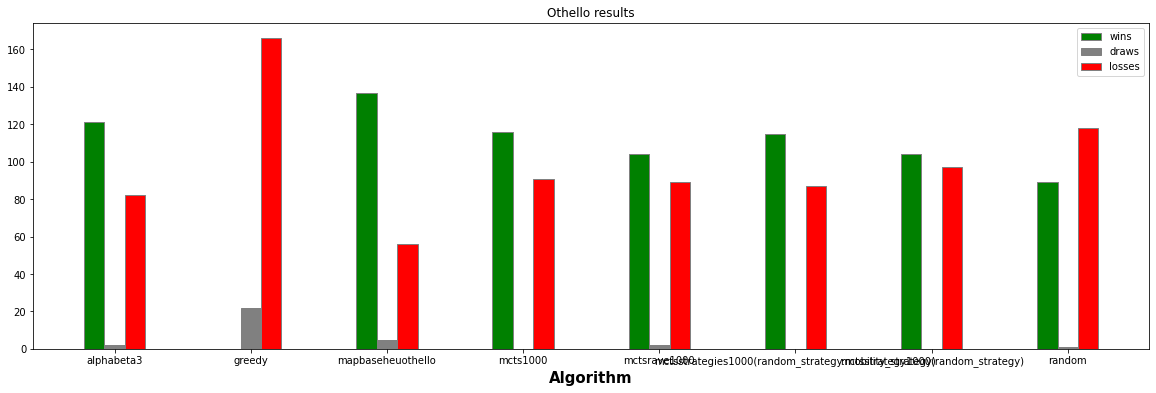

In [56]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(20, 6))
 
# set height of bar
wins = [v[0] for v in othello_results_dict.values()]
draws = [v[1] for v in othello_results_dict.values()]
losses = [v[2] for v in othello_results_dict.values()]

names = othello_results_dict.keys()
 
# Set position of bar on X axis
br1 = np.arange(len(wins))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, wins, color ='g', width = barWidth,
        edgecolor ='grey', label ='wins')
plt.bar(br2, draws, color ='grey', width = barWidth,
        edgecolor ='grey', label ='draws')
plt.bar(br3, losses, color ='r', width = barWidth,
        edgecolor ='grey', label ='losses')
 
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(wins))], names)
plt.title("Othello results")
 
plt.legend()
plt.show()

In [ ]:
draw_graphs(df_othello)

## Hex

In [67]:
df_hex = df[df['game_type']=='hex']

In [68]:
assert sum(df_hex["player2"].unique() == df_hex["player1"].unique()), 'Different players arrays'

In [69]:
n_games1 = len(df_hex.loc[(df_hex['player1'] == df_hex["player1"].unique()[0])])
for player1 in df_hex["player1"].unique():
    assert n_games1 == len(df_hex.loc[(df_hex['player1'] == player1)]), 'Different games player by first players'

n_games2 = len(df_hex.loc[(df_hex['player2'] == df_hex["player2"].unique()[0])])
for player2 in df_hex["player2"].unique():
    assert n_games2 == len(df_hex.loc[(df_hex['player2'] == player2)]), 'Different games player by second players'

assert n_games2 == n_games1, 'Different games player by players'

AssertionError: Different games player by first players

In [70]:
hex_results_dict = dict()
players = np.unique(np.concatenate((df_othello["player1"].unique(), df_othello["player2"].unique())))
for player_name in players:
    hex_results_dict[player_name] = [0,0,0]

for key in hex_results_dict.keys():
    # wins
    hex_results_dict[key][0] += len(df_hex.loc[(df_hex['player1'] == key) & (df_hex['winner'] == 1)])
    hex_results_dict[key][0] += len(df_hex.loc[(df_hex['player2'] == key) & (df_hex['winner'] == 2)])
    # draws
    hex_results_dict[key][1] += len(df_hex.loc[(df_hex['player1'] == key) & (df_hex['winner'] == 0)])
    hex_results_dict[key][1] += len(df_hex.loc[(df_hex['player2'] == key) & (df_hex['winner'] == 0)])
    # losses
    hex_results_dict[key][2] += len(df_hex.loc[(df_hex['player1'] == key) & (df_hex['winner'] == 2)])
    hex_results_dict[key][2] += len(df_hex.loc[(df_hex['player2'] == key) & (df_hex['winner'] == 1)])

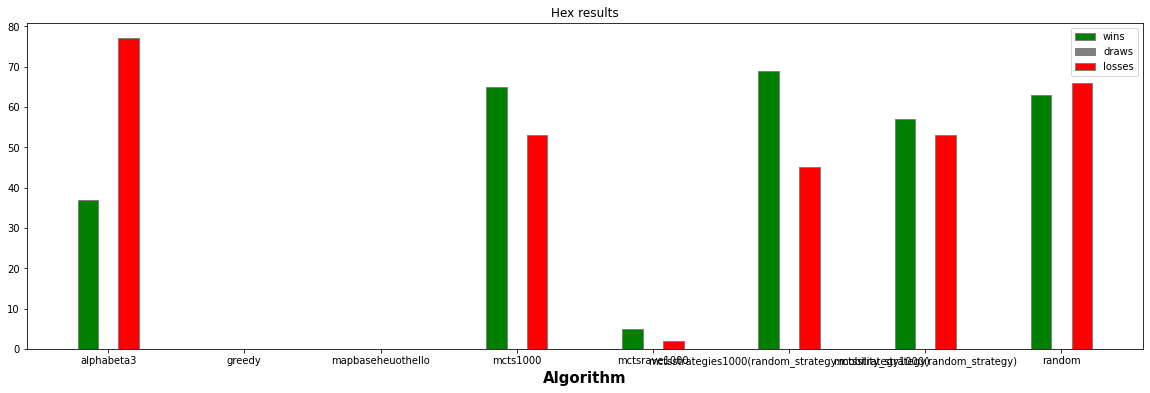

In [72]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(20, 6))
 
# set height of bar
wins = [v[0] for v in hex_results_dict.values()]
draws = [v[1] for v in hex_results_dict.values()]
losses = [v[2] for v in hex_results_dict.values()]

names = hex_results_dict.keys()
 
# Set position of bar on X axis
br1 = np.arange(len(wins))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, wins, color ='g', width = barWidth,
        edgecolor ='grey', label ='wins')
plt.bar(br2, draws, color ='grey', width = barWidth,
        edgecolor ='grey', label ='draws')
plt.bar(br3, losses, color ='r', width = barWidth,
        edgecolor ='grey', label ='losses')
 
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(wins))], names)
plt.title("Hex results")
 
plt.legend()
plt.show()

In [ ]:
draw_graphs(df_hex)

## Hive

In [77]:
df_hive = df[df['game_type']=='hive']

In [78]:
assert sum(df_hive["player2"].unique() == df_hive["player1"].unique()), 'Different players arrays'

In [79]:
n_games1 = len(df_hive.loc[(df_hive['player1'] == df_hive["player1"].unique()[0])])
for player1 in df_hive["player1"].unique():
    assert n_games1 == len(df_hive.loc[(df_hive['player1'] == player1)]), 'Different games played by first players'

n_games2 = len(df_hive.loc[(df_hive['player2'] == df_hive["player2"].unique()[0])])
for player2 in df_hive["player2"].unique():
    assert n_games2 == len(df_hive.loc[(df_hive['player2'] == player2)]), 'Different games played by second players'

assert n_games2 == n_games1, 'Different games played by players'

In [80]:
hive_results_dict = dict()
players = np.unique(np.concatenate((df_othello["player1"].unique(), df_othello["player2"].unique())))
for player_name in players:
    hive_results_dict[player_name] = [0,0,0]

for key in hive_results_dict.keys():
    # wins
    hive_results_dict[key][0] += len(df_hive.loc[(df_hive['player1'] == key) & (df_hive['winner'] == 1)])
    hive_results_dict[key][0] += len(df_hive.loc[(df_hive['player2'] == key) & (df_hive['winner'] == 2)])
    # draws
    hive_results_dict[key][1] += len(df_hive.loc[(df_hive['player1'] == key) & (df_hive['winner'] == 0)])
    hive_results_dict[key][1] += len(df_hive.loc[(df_hive['player2'] == key) & (df_hive['winner'] == 0)])
    # losses
    hive_results_dict[key][2] += len(df_hive.loc[(df_hive['player1'] == key) & (df_hive['winner'] == 2)])
    hive_results_dict[key][2] += len(df_hive.loc[(df_hive['player2'] == key) & (df_hive['winner'] == 1)])

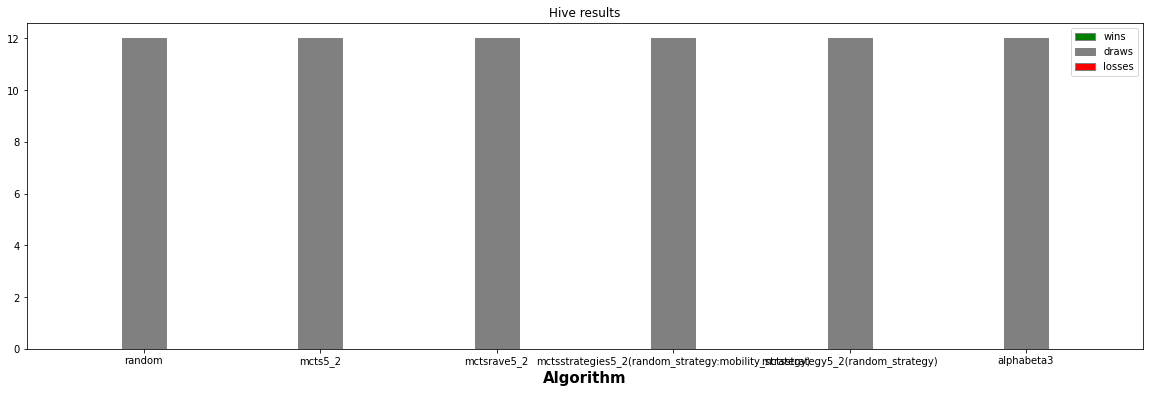

In [81]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 6))
 
# set height of bar
wins = [v[0] for v in hive_results_dict.values()]
draws = [v[1] for v in hive_results_dict.values()]
losses = [v[2] for v in hive_results_dict.values()]

names = hive_results_dict.keys()
 
# Set position of bar on X axis
br1 = np.arange(len(wins))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, wins, color ='g', width = barWidth,
        edgecolor ='grey', label ='wins')
plt.bar(br2, draws, color ='grey', width = barWidth,
        edgecolor ='grey', label ='draws')
plt.bar(br3, losses, color ='r', width = barWidth,
        edgecolor ='grey', label ='losses')
 
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(wins))], names)
plt.title("Hive results")
 
plt.legend()
plt.show()